# 스튜던트 t 분포

## Fat tail 현상

데이터 분석 실무에서는 자연에서 발생하는 현상 중 많은 것들을 정규 분포를 따르는 확률 변수로 모형화하여 사용하고 있다. 그러나 이러한 데이터들을 자세히 살펴보면 실제로는 정규분포보다 양 끝단의 비중이 더 큰것을 알 수 있다. 이를 fat tail 현상이라고 한다.

예를 들어 주식의 수익률은 보통 정규 분포를 따르는 것으로 모형화하여 사용한다. 실제로 어느 정도 정규 분포를 따르는지 데이터에서 확인해 보자.

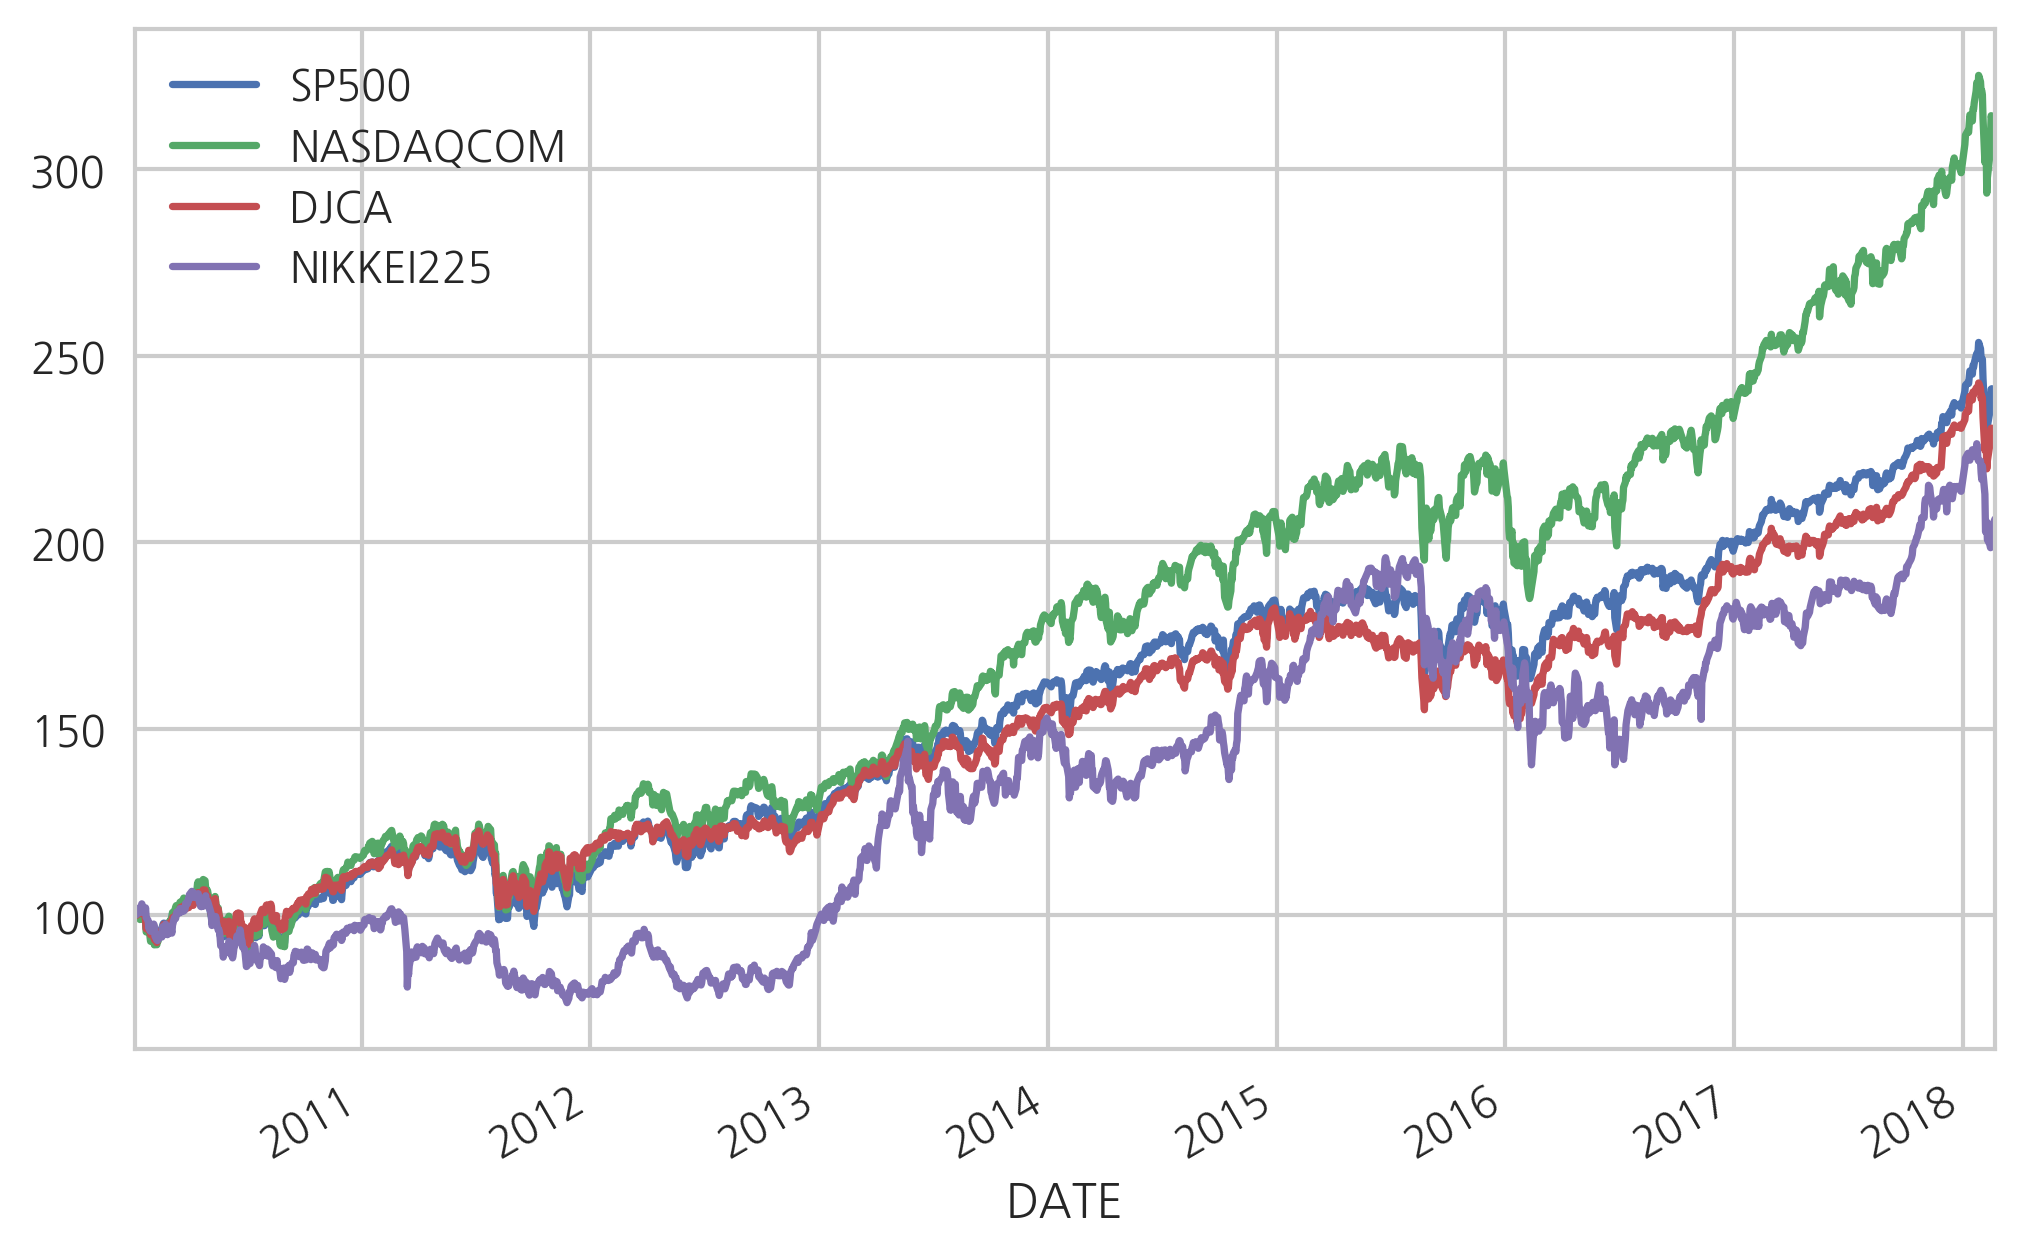

In [1]:
import pandas_datareader.data as web

symbols = ['SP500', 'NASDAQCOM', 'DJCA', 'NIKKEI225']
data = pd.DataFrame()
for sym in symbols:
    data[sym] = web.DataReader(sym, data_source='fred')[sym]
data = data.dropna()
(data / data.iloc[0] * 100).plot()
plt.show()

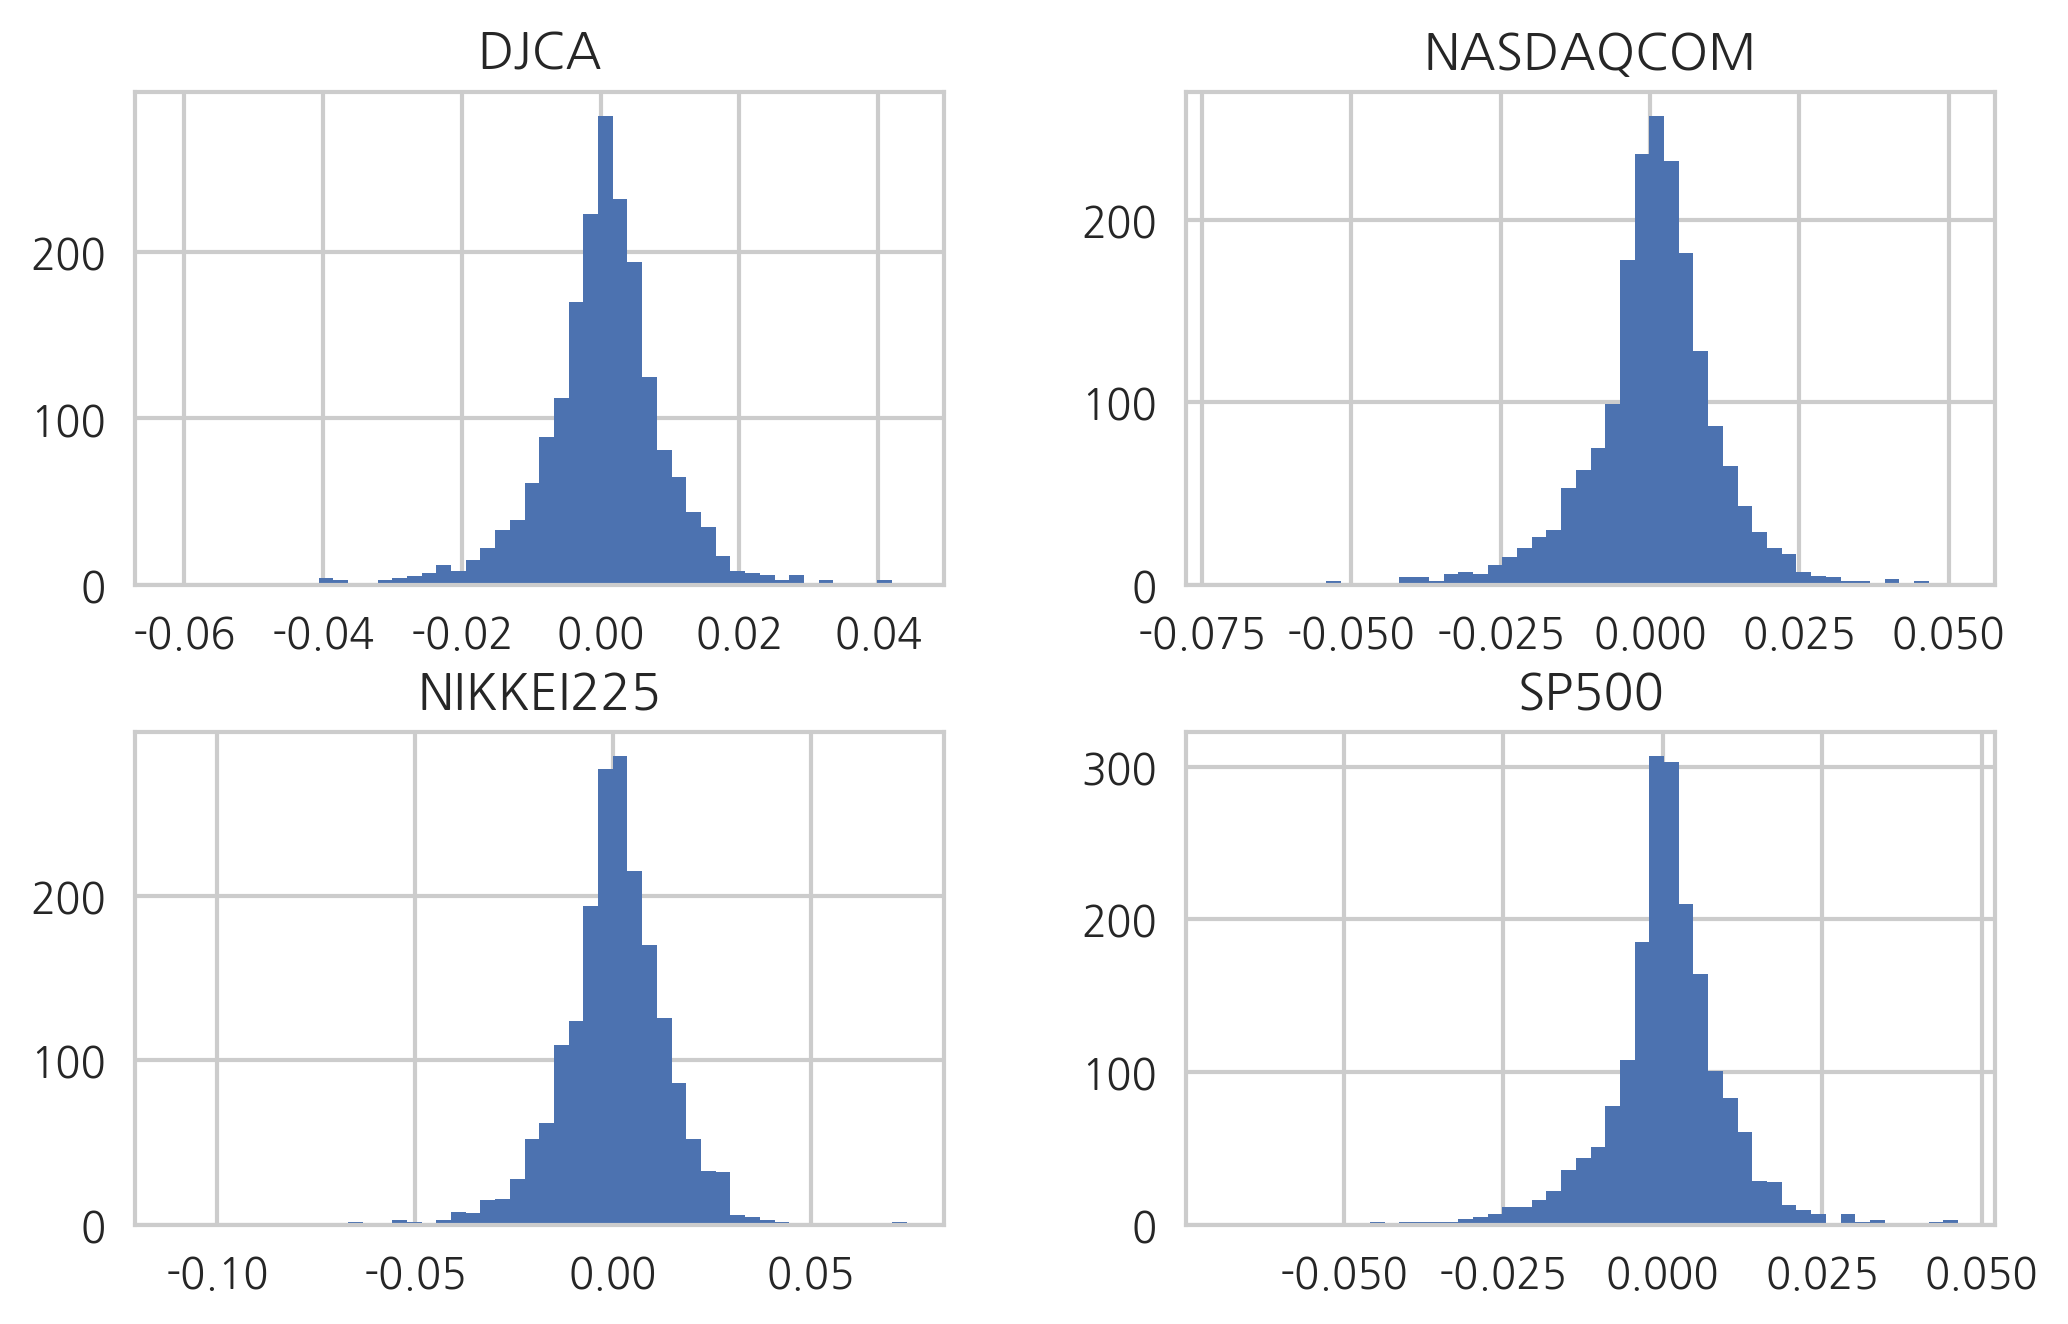

In [2]:
log_returns = np.log(data / data.shift(1))
log_returns.hist(bins=50)
plt.show()

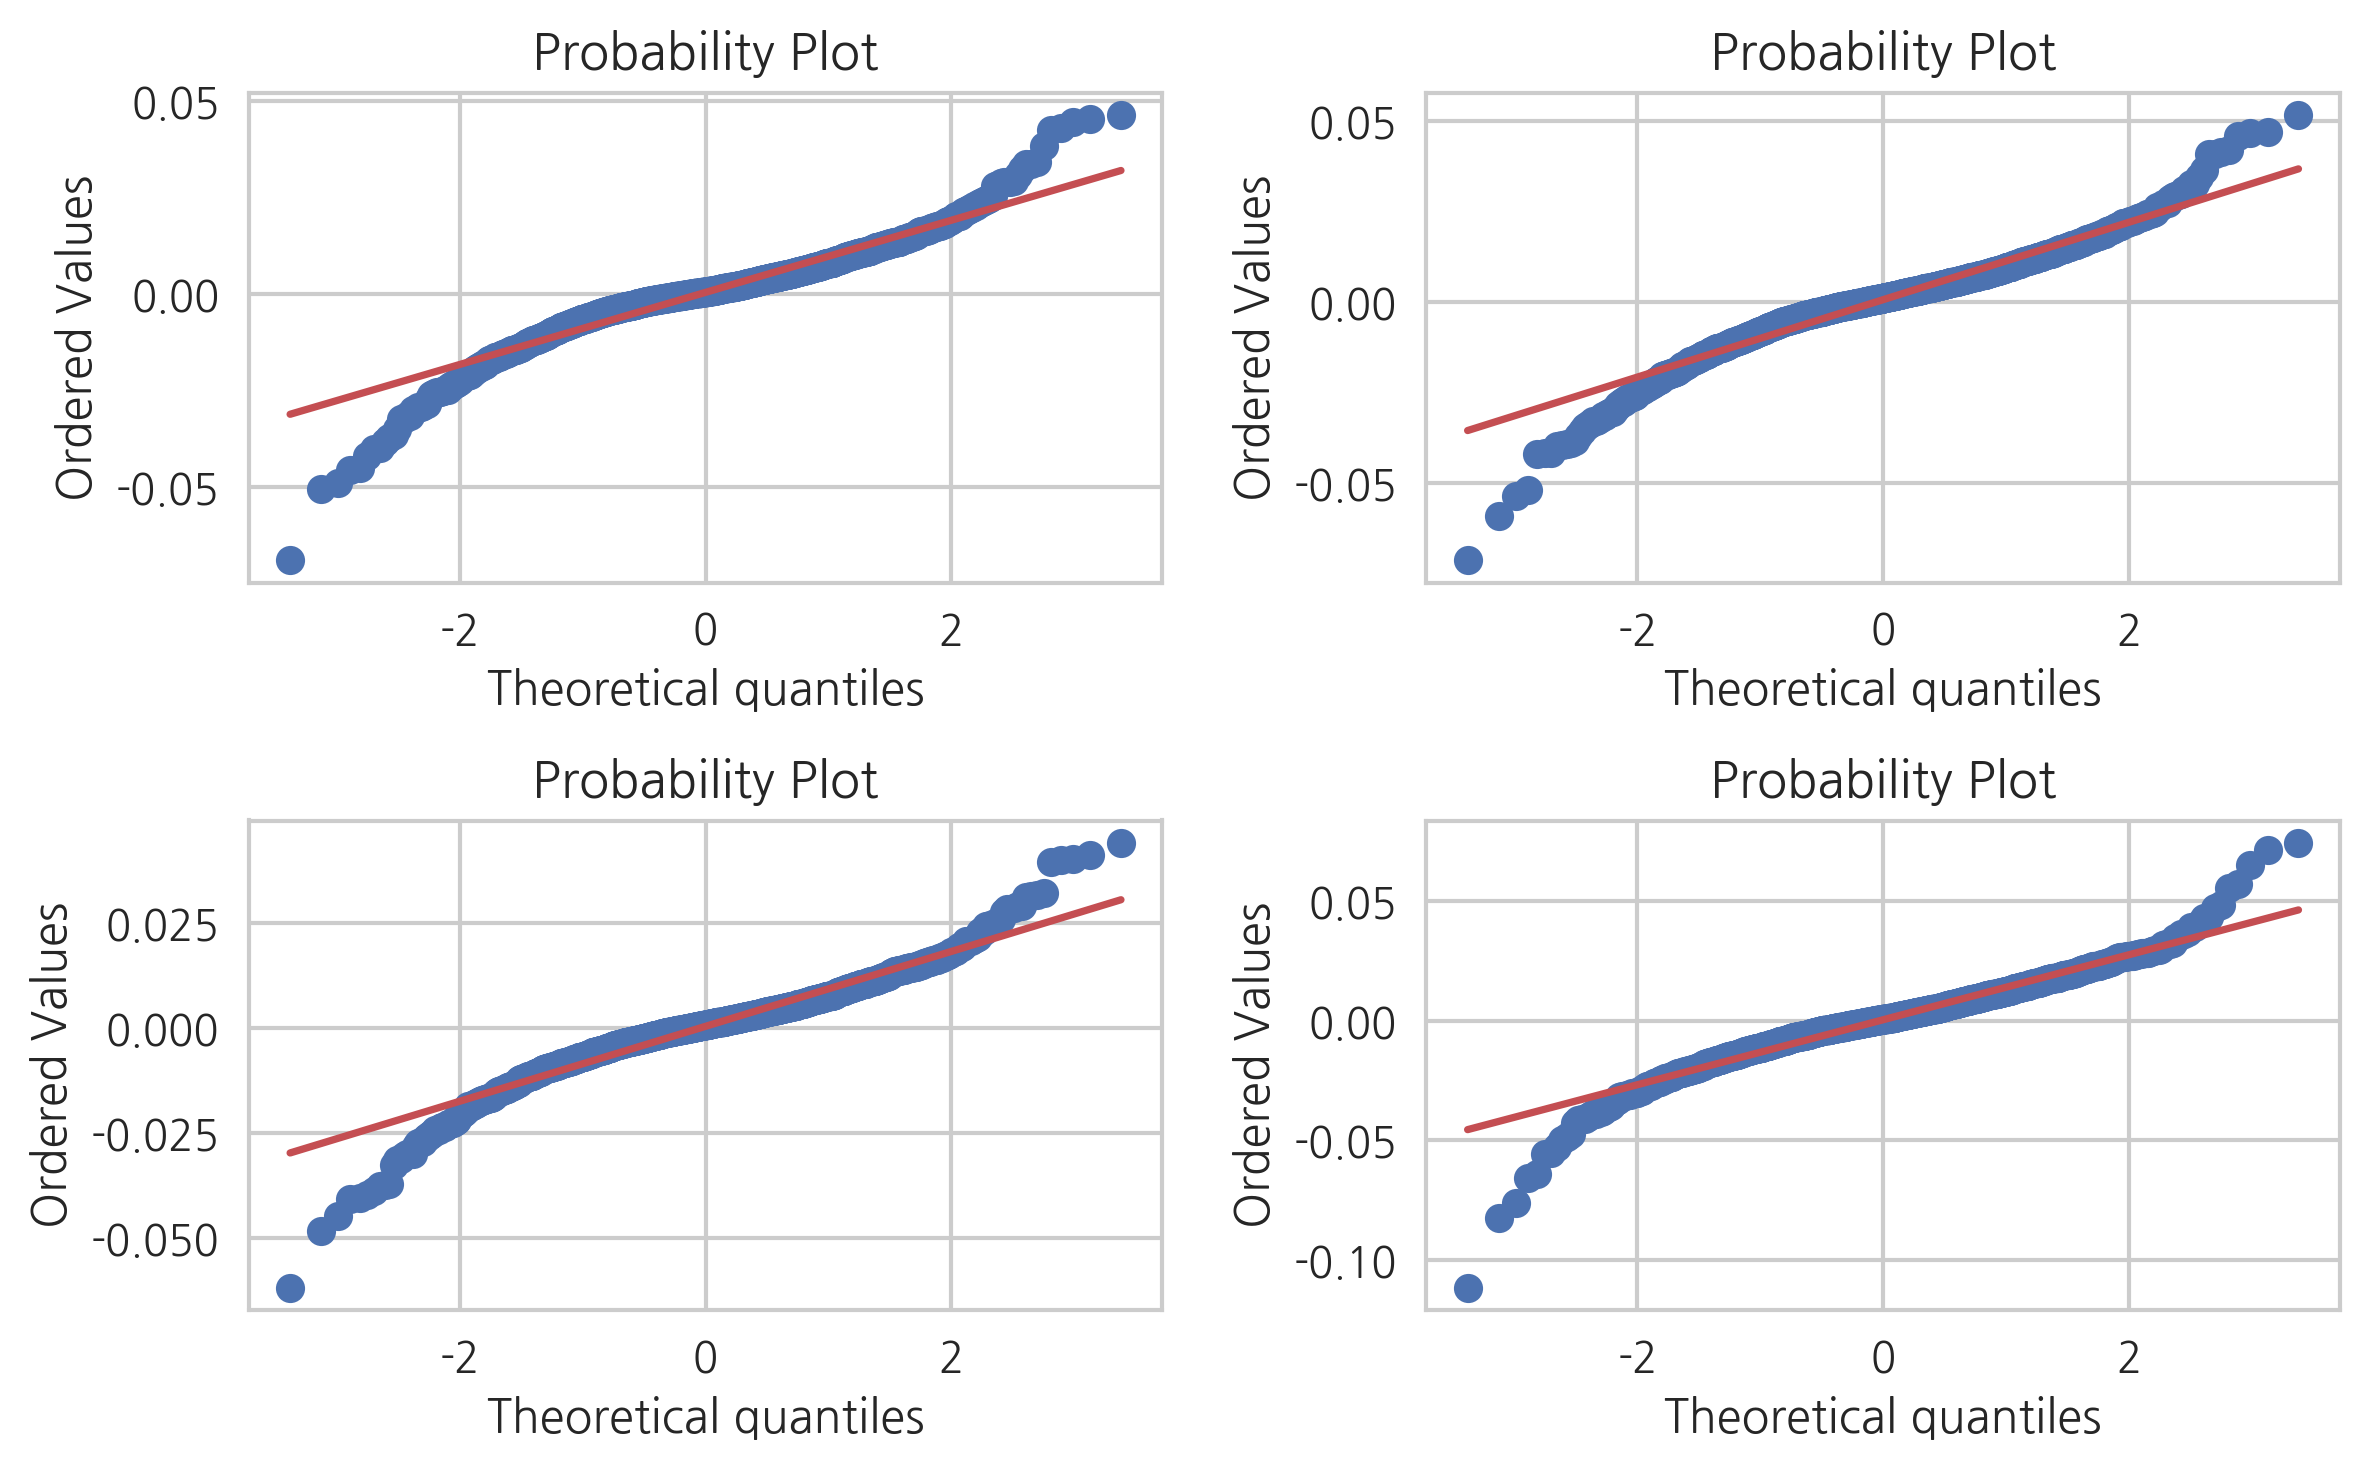

In [3]:
for i, sym in enumerate(symbols):
    ax = plt.subplot(2, 2, i+1)
    sp.stats.probplot(log_returns[sym].dropna(), plot=ax)
plt.tight_layout()
plt.show()    

이렇게 Fat tail 을 가진 데이터 모형에 적합한 것이 다음에 정의하는 스튜던트 t 분포이다.

## 스튜던트 t 분포

스튜던트 t 분포의 확률 밀도 함수는 다음 수식에 의해 정의된다. 가우시안 정규 분포와 달리 정수값을 가지는 자유도(degree of freedom)라는 모수(parameter) $\nu$를 추가적으로 가진다.

$$ t(x;\mu, \sigma^2, \nu) = \frac{\Gamma\left(\frac{\nu+1}{2}\right)} {\sqrt{\nu\pi}\Gamma\left(\frac{\nu}{2}\right)} \left(1+\frac{(x-\mu)^2}{\nu\sigma^2} \right)^{-\frac{\nu+1}{2}} $$


이 식에서 $\Gamma$는 감마(Gamma) 함수라는 특수 함수이다.

$$ \Gamma(x) = \int_0^\infty  u^{x-1} e^{-u} du $$

스튜던트 t 분포의 확률 밀도 함수를 그리려면 SciPy 패키지의 `t` 명령을 사용한다. 이 때 인수 `df`는 자유도, `loc`는 기댓값, `scale`은 표준 편차를 설정한다.

그림에서 자유도 $\nu$가 작으면 가우시안 정규 분포보다 분산이 크고 fat tail을 보이지만  자유도가 증가할수록 가우시안 정규 분포로 수렴하는 것을 볼 수 있다.

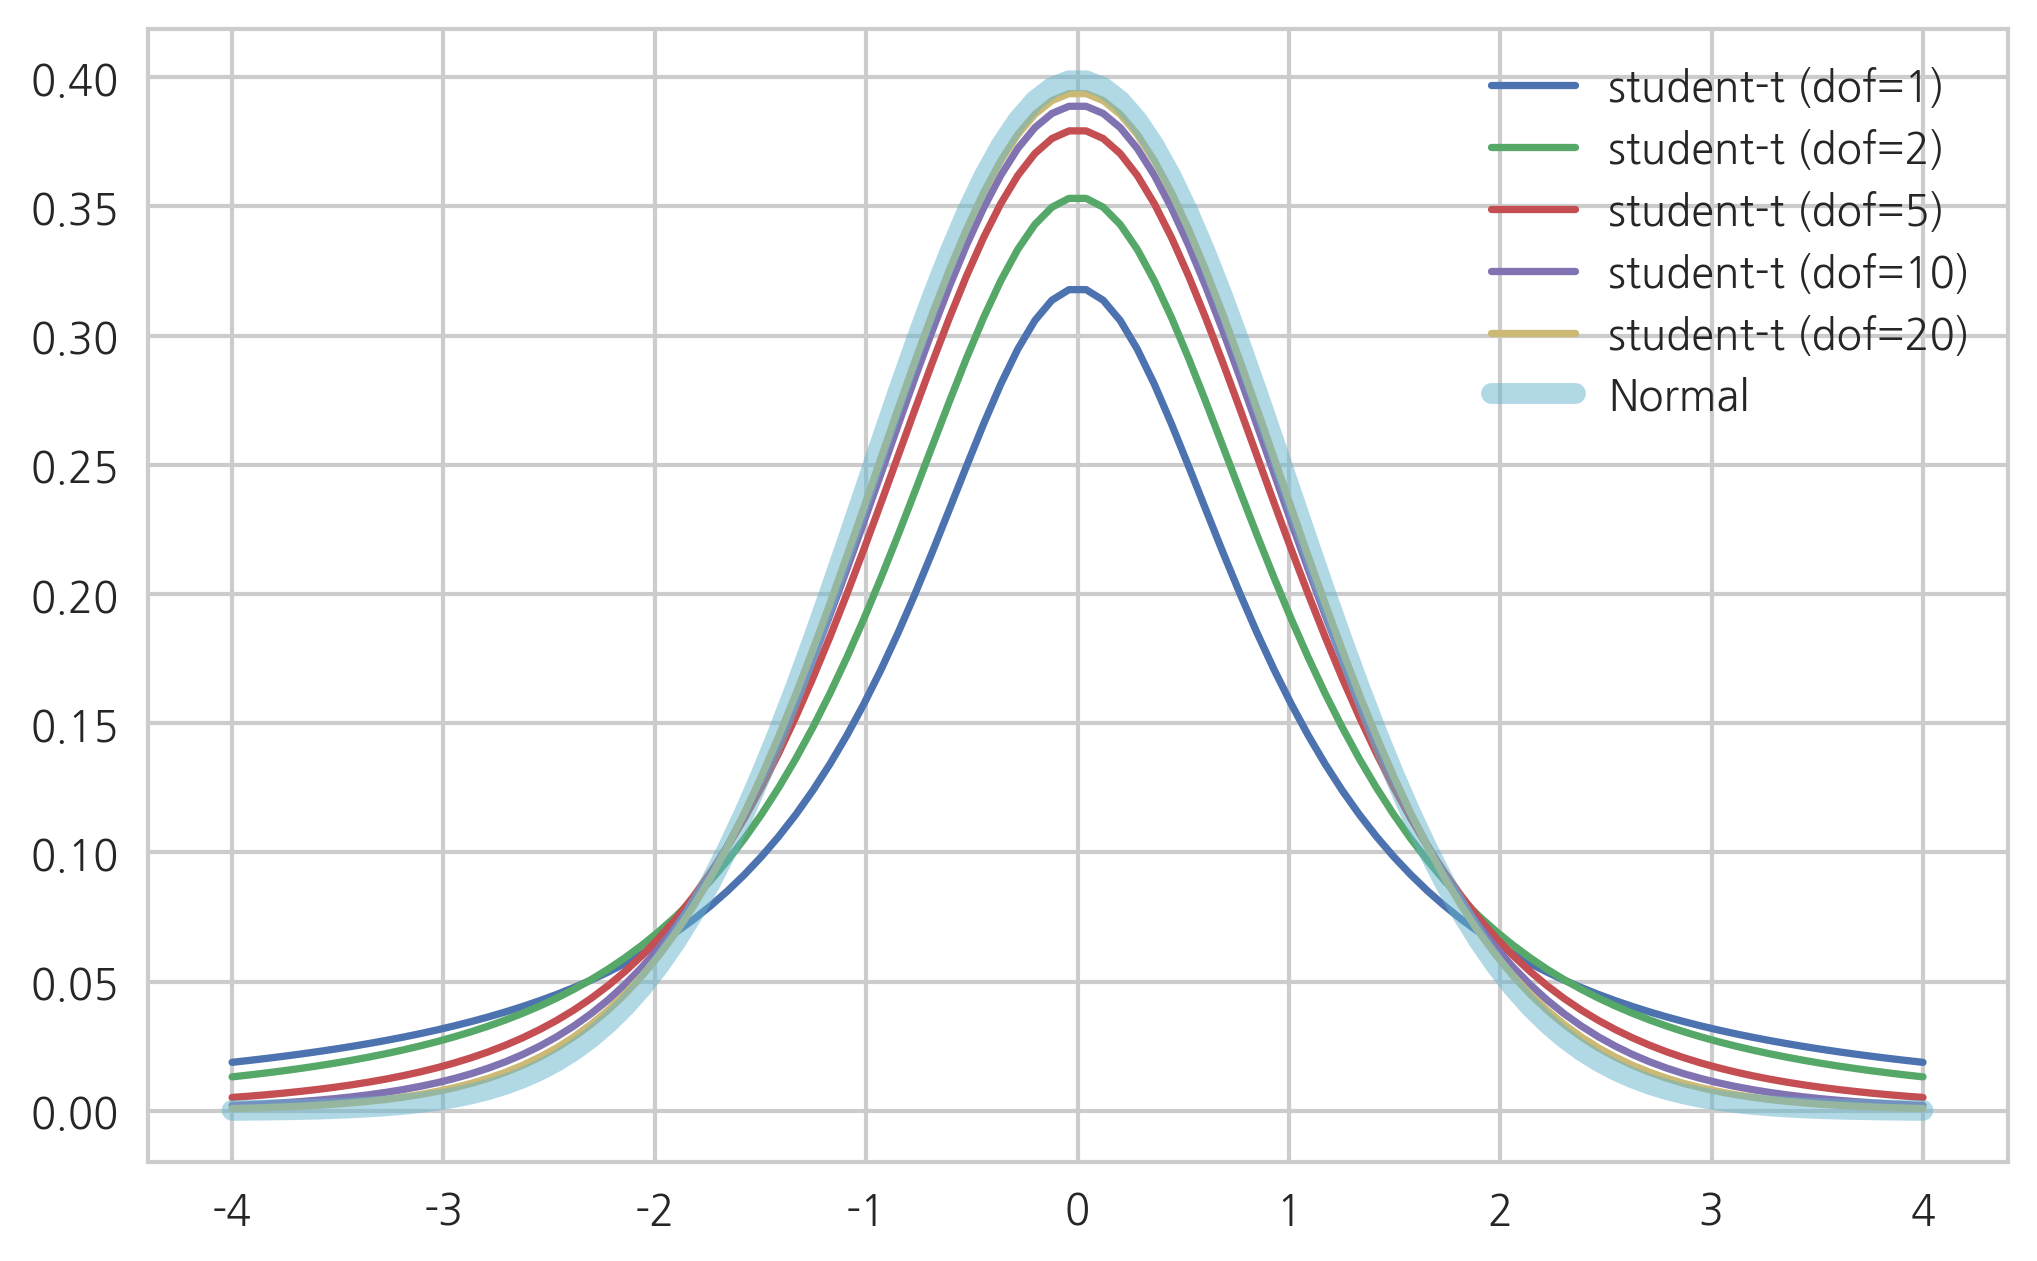

In [4]:
xx = np.linspace(-4, 4, 100)
for df in [1, 2, 5, 10, 20]:
    rv = sp.stats.t(df=df)
    plt.plot(xx, rv.pdf(xx), label=("student-t (dof=%d)" % df))
plt.plot(xx, sp.stats.norm().pdf(xx), label="Normal", lw=5, alpha=0.5)
plt.legend()
plt.show()

## 모멘트

스튜던트 t 분포의 기댓값과 분산은 다음과 같다.

* 기댓값: 
$$\text{E}[X] = \mu $$

* 분산: ($\nu > 2$ 인 경우만 적용됨. $\nu=1,2$일 때는 분산이 무한대)
$$ \text{Var}[X] = \dfrac{\nu \sigma^2}{\nu-2} $$


## 정규 분포의 샘플 평균이 이루는 분포

중심 극한 정리(Central Limit Theorem)에 따르면 모든 확률 변수의 합(또는 평균)은 샘플의 갯수가 증가할 수록 가우시안 정규 분포에 가까워진다.
그러면 샘플의 수가 무한대가 아닌 유한한 경우는 어떨까? 

가우시안 정규 분포로부터 얻은 $n$개의 샘플 $x_1, \cdots, x_n$ 로부터 얻은 **샘플 평균을 샘플 표준편차로 정규화한 값**은 자유도가 $n-1$인 스튜던트 t 분포를 이룬다.

여기에서 중요한 포인트는 샘플 표준편차로 정규화 하였다는 점이다. 정규 분포로 부터 얻은 샘플 데이터의 샘플 평균은 그 자체로는 항상 정규 분포를 따르지만 샘플 표준편차라고 하는 다른 확률 변수로 나누는 과정에서 정규 분포가 아닌 스튜던트 t분포를 따르게 된다.

이를 수식으로 나타내면 다음과 같다.

이론적 표준 편차라는 상수로 정규화한 샘플 평균은 정규 분포를 따른다.

$$  \frac{\bar{x} - \mu}{\dfrac{\sigma}{\sqrt{n}}} \sim \mathcal{N}(x; 0, 1) $$

하지만 샘플 평균을 샘플 분산으로 정규화한 값은 스튜던트 t 분포를 따른다.

$$  \frac{\bar{x} - \mu}{\dfrac{s}{\sqrt{n}}} \sim t(x; 0, 1, n - 1) $$

이 식에서 $ \bar{x}, s$은 각각 샘플 평균, 샘플 표준편차다.

$$ \bar{x} = \frac{x_1+\cdots+x_n}{n}  $$

$$ s^2 = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})^2 $$

이 정리는 추후 정규 분포의 기댓값에 관한 각종 검정(testing)에서 사용된다.

다음은 시뮬레이션을 사용하여 샘플 표준 편차로 정규화한 샘플 평균과 정규 분포를 비교한 것이다. 왼쪽은 $N=4$, 오른쪽은 $N=40$인 경우이다.

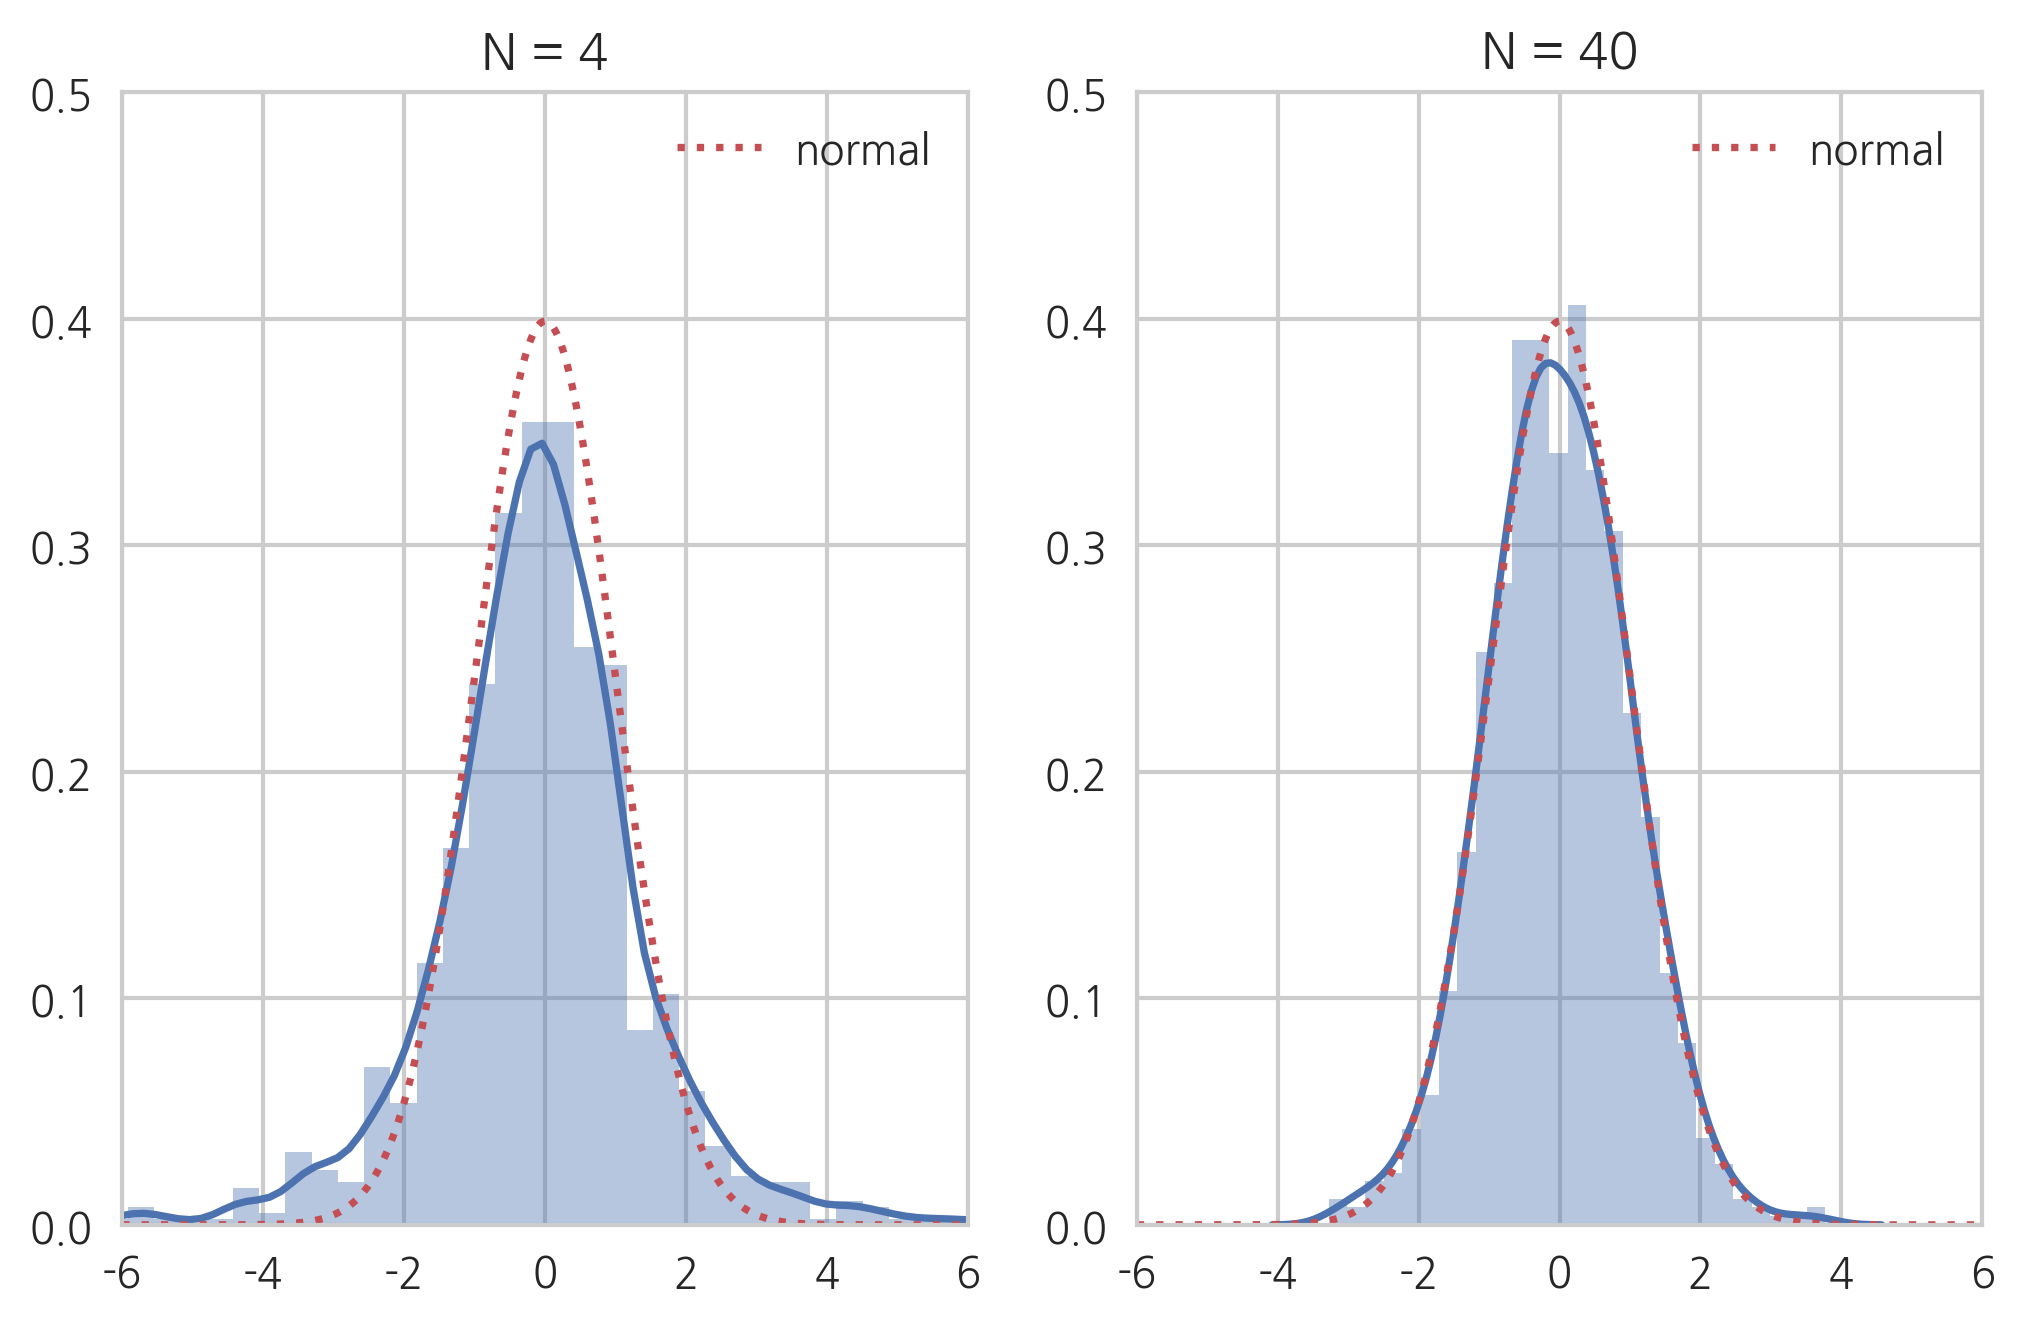

In [80]:
np.random.seed(0)

rv = sp.stats.norm()
M = 1000

plt.subplot(1, 2, 1)
N = 4
x1 = rv.rvs((N, M))
xbar1 = x1.mean(axis=0)
xstd1 = x1.std(axis=0, ddof=1)
x = xbar1 / (xstd1 / np.sqrt(N))
sns.distplot(x, kde=True)
xx = np.linspace(-6, 6, 1000)
plt.plot(xx, rv.pdf(xx), 'r:', label="normal")
plt.xlim(-6, 6)
plt.ylim(0, 0.5)
plt.title("N = 4")
plt.legend()

plt.subplot(1, 2, 2)
N = 40
x2 = rv.rvs((N, M))
xbar2 = x2.mean(axis=0)
xstd2 = x2.std(axis=0, ddof=1)
x = xbar2 / (xstd2 / np.sqrt(N))
sns.distplot(x, kde=True)
xx = np.linspace(-6, 6, 1000)
plt.plot(xx, rv.pdf(xx), 'r:', label="normal")
plt.xlim(-6, 6)
plt.ylim(0, 0.5)
plt.title("N = 40")
plt.legend()

plt.show()

## 통계량

복수의 샘플 데이터 집합을 수치적으로 연산하여 구한 숫자를 **통계량(statistics)**라고 한다. 위에서 구한 정규화된 샘플 표본도 통계량의 일종이며 **스튜던트-t 분포는 "정규화된 샘플 표본"이라는 통계량이 따르는 분포**이다. 이렇게 통계량을 구하는 수식에 따라 어떤 분포를 이루는가는 추후 검정과 추정에서 중요한 역할을 한다.